In [1]:
import pandas as pd
data=pd.read_csv('accepted_2007_to_2018Q4.csv')

/Users/spencersiegel/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


I am looking at columns from total_il_high_credit_limit - hardship_status
These are columns 114 to 131

In [5]:
list(data.columns).index('total_il_high_credit_limit')
list(data.columns).index('hardship_status')

131

In [74]:
my_subset=data.iloc[:,114:131]
import dtale
#dtale.show(my_subset)

In [44]:
#4a Are there any missing values? NaN? How many?
print(my_subset.isna().sum()/len(my_subset.iloc[:,1:1]))

#4b Number of unique values? 
print(my_subset.nunique())

total_il_high_credit_limit             0.031101
revol_bal_joint                        0.952218
sec_app_fico_range_low                 0.952218
sec_app_fico_range_high                0.952218
sec_app_earliest_cr_line               0.952218
sec_app_inq_last_6mths                 0.952218
sec_app_mort_acc                       0.952218
sec_app_open_acc                       0.952218
sec_app_revol_util                     0.953030
sec_app_open_act_il                    0.952218
sec_app_num_rev_accts                  0.952218
sec_app_chargeoff_within_12_mths       0.952218
sec_app_collections_12_mths_ex_med     0.952218
sec_app_mths_since_last_major_derog    0.984101
hardship_flag                          0.000015
hardship_type                          0.995171
hardship_reason                        0.995171
dtype: float64
total_il_high_credit_limit             194137
revol_bal_joint                         56875
sec_app_fico_range_low                     62
sec_app_fico_range_high        

Only column without over 95% NA is Total installment high credit/credit limit

Fix categorical and numerical variables. Hardship type only has one possible value (otherwise NA)

Can't have no hardship flag but still have hardship type. Let's get rid of these rows 

Only value for hadship type is 'INTEREST ONLY-3 MONTHS DEFERRAL' so we can drop this column.

In [78]:
my_subset.hardship_type.unique()
my_subset.hardship_reason.unique()

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
2260696    0.0
2260697    0.0
2260698    0.0
2260699    NaN
2260700    NaN
Name: hardship_flag, Length: 2260701, dtype: float64

In [79]:
my_subset.hardship_flag=my_subset.hardship_flag.replace({'N':0}).replace({'Y':1}).astype('float64')

In [80]:
my_subset=my_subset[~((my_subset.hardship_flag==0)&(~my_subset.hardship_type.isna()))]
my_subset=my_subset[~((my_subset.hardship_flag==0)&(~my_subset.hardship_reason.isna()))]

my_subset=my_subset.drop(['hardship_type'],axis=1)
my_subset.hardship_flag=my_subset.hardship_flag.astype('category')
my_subset.hardship_reason=my_subset.hardship_reason.astype('category')

In [81]:
my_subset.sec_app_earliest_cr_line=pd.to_datetime(my_subset['sec_app_earliest_cr_line'])

sec_app_fico_range_low is just 4 below high every time. Can remove one of the values

In [90]:
my_subset=my_subset.drop(['sec_app_fico_range_high'],axis=1)
my_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2250616 entries, 0 to 2260700
Data columns (total 15 columns):
total_il_high_credit_limit             float64
revol_bal_joint                        float64
sec_app_fico_range_low                 float64
sec_app_earliest_cr_line               datetime64[ns]
sec_app_inq_last_6mths                 float64
sec_app_mort_acc                       float64
sec_app_open_acc                       float64
sec_app_revol_util                     float64
sec_app_open_act_il                    float64
sec_app_num_rev_accts                  float64
sec_app_chargeoff_within_12_mths       float64
sec_app_collections_12_mths_ex_med     float64
sec_app_mths_since_last_major_derog    float64
hardship_flag                          category
hardship_reason                        category
dtypes: category(2), datetime64[ns](1), float64(12)
memory usage: 244.7 MB


In [ ]:
dtale.show(my_subset)

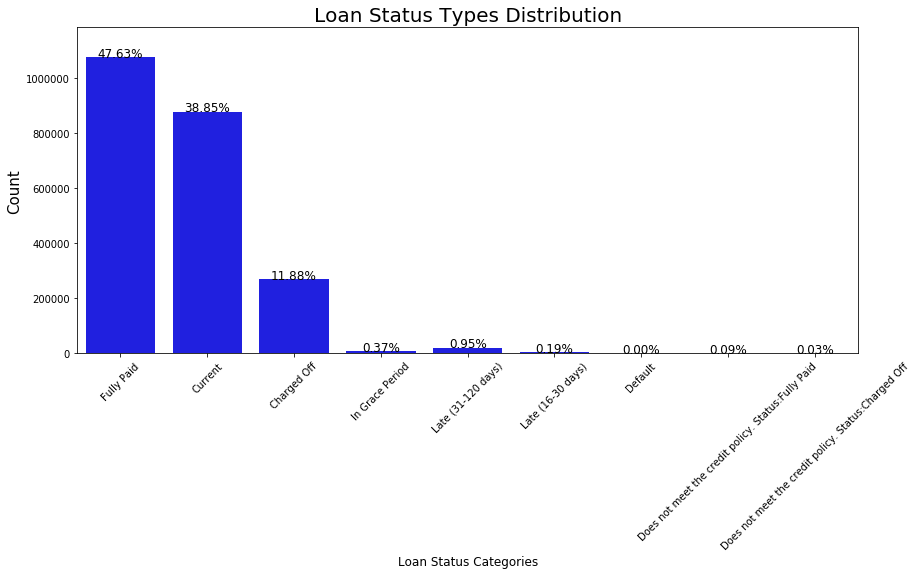

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (14,6))

g = sns.countplot(x="loan_status", data=data, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(data)*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()